In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-rainfall-classification-dataset/rainfall.csv


Importação das bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Leitura do Arquivo .csv

In [3]:
df=pd.read_csv("/kaggle/input/simple-rainfall-classification-dataset/rainfall.csv")

Visualizando os dados do arquivo

In [4]:
df.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


Visualizando informações gerais do arquivo.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


Visualizando tamanho do arquivo

In [6]:
df.shape

(54, 6)

Quantidade de registros faltantes

In [7]:
df.isnull().sum()

date                 0
rainfall             1
temperature          1
humidity             1
wind_speed           1
weather_condition    1
dtype: int64

Retirando registros com dados nulos.

In [8]:
df = df.dropna()

Retirando campos desnecessários.

In [9]:
df = df.drop(['date'], axis=1)

Visualizando limpeza de registros faltantes.

In [10]:
df.isnull().sum()

rainfall             0
temperature          0
humidity             0
wind_speed           0
weather_condition    0
dtype: int64

Visualizando quantidade agrupada de variável alvo.

In [11]:
df['weather_condition'].value_counts()

weather_condition
Rainy    42
Sunny    11
Name: count, dtype: int64

Gráfico de barras para visualização de comparação entre as informações da variável alvo.

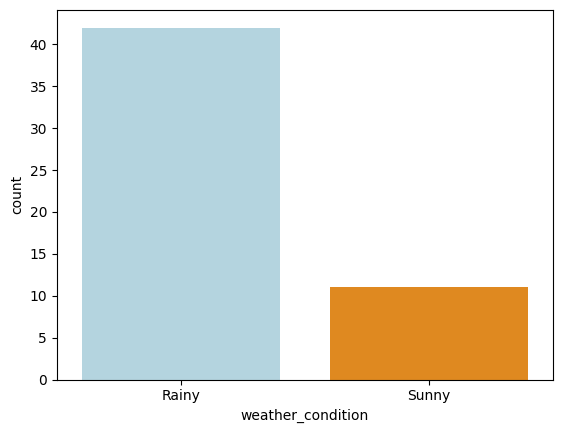

In [12]:
custom_palette = {'Rainy': 'lightblue', 'Sunny': 'darkorange'}
sns.countplot(x='weather_condition', data=df, palette=custom_palette)
plt.show()

Criação dos dataframes de variáveis alvo e variáveis preditoras.

In [13]:
t = df['weather_condition']
p = df.drop('weather_condition', axis = 1)

Tamanho da variável alvo.

In [14]:
t.shape

(53,)

Visualizando a variável alvo.

In [15]:
t.head()

0    Rainy
1    Rainy
2    Sunny
3    Rainy
4    Rainy
Name: weather_condition, dtype: object

Tamanho das variáveis preditoras

In [16]:
p.shape

(53, 4)

Visualizando as variáveis preditoras.

In [17]:
p.head()

,rainfall,temperature,humidity,wind_speed
0,12.5,15.2,78.0,8.5
1,8.2,17.8,65.0,5.2
2,0.0,20.1,52.0,3.1
3,3.7,18.6,71.0,6.7
4,21.1,14.8,82.0,9.3


Separação dos dataframes de treino e teste para o modelo, considerando 30% para teste e 70% para treino.

In [18]:
from sklearn.model_selection import train_test_split

t_train, t_test, p_train, p_test = train_test_split(t, p, test_size = 0.3)

Visualizando a separação de 30% do dataframe para teste.

In [19]:
t_test.shape

(16,)

In [20]:
t_train.shape

(37,)

Visualizando a separação de 70% do dataframe para treino.Visualizando a separação de 70% do dataframe para treino.

In [21]:
p_test.shape

(16, 4)

In [22]:
p_train.shape

(37, 4)

Chamando a função ExtraTressClassifier (Árvore de decisão) para treinar de acordo com 70% do dataframe com as variáveis preditoras e alvo.

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(p_train, t_train)

ExtraTreesClassifier()

Visualizando a performance do modelo obtido, aplicando as variáveis a serem testadas.

In [24]:
result = (model.score(p_test, t_test))*100
print(f'Performance:  {result}' '%')

Performance:  93.75%


Visualizando os resultados dos testes para 3 registros.

In [25]:
t_test[10:13]

10    Rainy
26    Sunny
50    Rainy
Name: weather_condition, dtype: object

In [26]:
p_test[10:13]

,rainfall,temperature,humidity,wind_speed
10,9.5,16.2,72.0,5.7
26,0.0,22.9,47.0,2.5
50,9.6,18.6,71.0,6.7


Validação do modelo de árvore de decisão.

In [27]:
pred = model.predict(p_test[10:13])

In [28]:
print(pred)

['Rainy' 'Sunny' 'Rainy']
